In [1]:
import numpy as np
import scipy as sp

from tqdm.notebook import tqdm
from time import time

import matplotlib.pyplot as plt
from matplotlib import cm

%config InlineBackend.figure_format = 'svg'

In [2]:
def gen_random(n, spectrum):
    A = np.random.randn(n, n)
    U, _ = np.linalg.qr(A)
    
    B = np.random.randn(n, n)
    V, _ = np.linalg.qr(B)
    
    D  = np.zeros((n, n))
    np.fill_diagonal(D, spectrum)
    
    return U @ D @ V

def qr_rank(matrix, eps=1e-5):    
    _, r, _ = sp.linalg.qr(matrix, pivoting=True)
    r = r ** 2
    r = r.sum(1)
    
    r_cumsum = np.cumsum(r)
    r_cumsum /= r_cumsum[-1]
    
    k = np.where(r_cumsum >= 1 - eps)[0][0] + 1
    
    return k

def svd_rank(matrix, eps=1e-5):
    _, s, _ = sp.linalg.svd(matrix, full_matrices=False)
    
    s = s ** 2
    
    s_cumsum = np.cumsum(s)
    s_cumsum /= s_cumsum[-1]
    
    k = np.where(s_cumsum >= 1 - eps)[0][0] + 1
    
    return k
    

  0%|          | 0/500 [00:00<?, ?it/s]

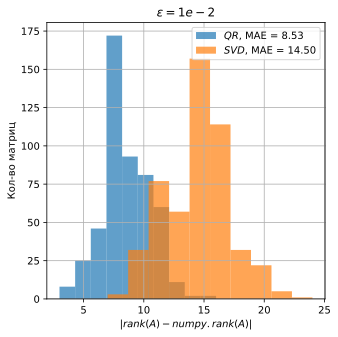

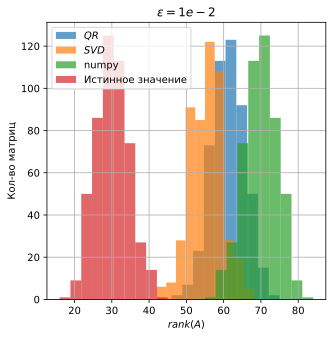

  0%|          | 0/500 [00:00<?, ?it/s]

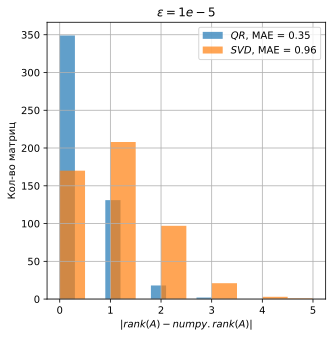

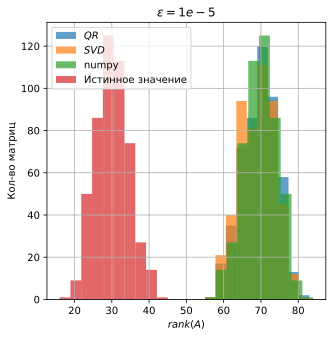

  0%|          | 0/500 [00:00<?, ?it/s]

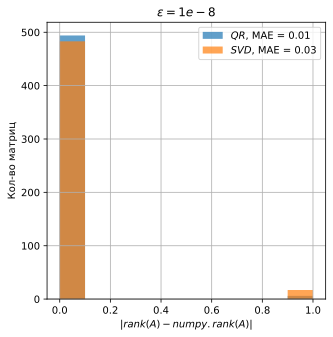

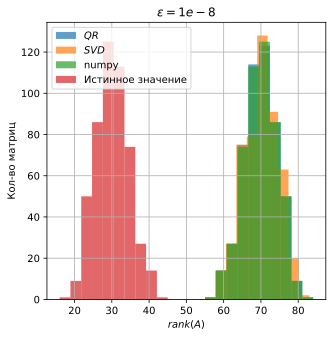

In [3]:

N = 100
iter_count = 500

for e in [1e-2, 1e-5, 1e-8]:
    np.random.seed(42)
    y_true = np.zeros(iter_count)
    y_qr = np.zeros(iter_count)
    y_svd = np.zeros(iter_count)
    y_numpy = np.zeros(iter_count)

    for i in tqdm(range(iter_count)):
        spectrum = np.random.binomial(n=1, p=0.7, size=N).astype(float)
        spectrum *= np.random.uniform(-1000, 1000, size=N)
        A = gen_random(N, spectrum)

        y_true[i] = np.sum(np.isclose(spectrum, 0))
        y_qr[i] = qr_rank(A, eps=e)
        y_svd[i] = svd_rank(A, eps=e)
        y_numpy[i] = np.linalg.matrix_rank(A, tol=e)
        
    qr_mae = np.abs(y_numpy - y_qr)
    svd_mae = np.abs(y_numpy - y_svd)
    
    plt.figure(figsize=(5, 5))
    plt.hist(qr_mae, alpha=0.7, label=fr"$QR$, MAE = {np.mean(qr_mae):0.2f}")
    plt.hist(svd_mae, alpha=0.7, label=fr"$SVD$, MAE = {np.mean(svd_mae):0.2f}")
    plt.legend()
    plt.title(fr"$\varepsilon = 1e{int(np.log10(e))}$")
    plt.xlabel(r"$|rank(A) - numpy.rank(A)|$")
    plt.ylabel("Кол-во матриц")
    plt.grid()

    plt.savefig(f"res_acc1{-int(np.log10(e))}.svg")
    plt.savefig(f"res_acc1{-int(np.log10(e))}.png")
    plt.show()
    
    plt.figure(figsize=(5, 5))
    plt.hist(y_qr, alpha=0.7, label=r"$QR$")
    plt.hist(y_svd, alpha=0.7, label=r"$SVD$")
    plt.hist(y_numpy, alpha=0.7, label="numpy")
    plt.hist(y_true, alpha=0.7, label="Истинное значение")
    plt.title(fr"$\varepsilon = 1e{int(np.log10(e))}$")
    plt.xlabel(r"$rank(A)$")
    plt.ylabel("Кол-во матриц")

    plt.legend()
    plt.grid()

    plt.savefig(f"res_acc2{-int(np.log10(e))}.svg")
    plt.savefig(f"res_acc2{-int(np.log10(e))}.png")
    plt.show()